<a href="https://colab.research.google.com/github/hyeyoungkoh/Instantaneous-Center-Method-for-Diaphragms/blob/main/test.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import packages**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
!git clone https://github.com/hyeyoungkoh/Instantaneous-Center-Method-for-Diaphragms.git
%cd Instantaneous-Center-Method-for-Diaphragms
from group import *
from IC import *
import matplotlib.pyplot as plt
import numpy as np


Mounted at /content/drive
Cloning into 'Instantaneous-Center-Method-for-Diaphragms'...
remote: Enumerating objects: 35, done.
remote: Counting objects: 100% (35/35), done.
remote: Compressing objects: 100% (30/30), done.
remote: Total 35 (delta 13), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (35/35), 34.01 KiB | 8.50 MiB/s, done.
Resolving deltas: 100% (13/13), done.
/content/Instantaneous-Center-Method-for-Diaphragms


# **Fastener Layout**

In [ ]:
# To estimate the shear strength of a diaphragm that includes fasteners, you first need to obtain the coordinates of those fasteners.
# The 'group.py' file offers group functions to assist with this task. It includes: 'support_group' for interior support fasteners; 'end_group' for end support fasteners; 'edge_group' for edge support fasteners; and 'side_group' for side-lap fasteners.
# For comparison, we utilized data from 7 specimens in the SDII database: Pinkham (1999) covers specimens 50 through 54, and Essa (2003) includes specimens 11 and 15. You can select any of these examples to acquire the coordinates for the fasteners in the respective specimens.
# To manually obtain the coordinates of the fasteners, input values into the group functions. Each function requires four inputs:  Number of columns, Number of rows, Column spacing, Row spacing.

# #Pinkham 50, 51
# interior_x, interior_y = support_group(2,31,5*12,6)
# end_x,end_y = end_group(2,25,15*12,15*12/26)
# edge_x, edge_y = support_group(18, 2, 10, 15*12)
# side_x, side_y = side_group(27, 4, 15*12/28, 36)

#Pinkham 52, 54
# interior_x, interior_y = support_group(1,22,10*12,21*12/23)
# end_x, end_y = end_group(2,14,20*12,21*12/15)
# edge_x, edge_y = support_group(18, 2, 20*12/19, 21*12)
# side_x, side_y = side_group(8, 6, 20*12/9, 36)

#Pinkham 53
# interior_x, interior_y = support_group(1,43,10*12,21*12/44)
# end_x,end_y = end_group(2,35,20*12,21*12/36)
# edge_x, edge_y = support_group(18, 2, 20*12/19, 21*12)
# side_x, side_y = side_group(8, 6, 20*12/9, 36)

#Essa 11, 15
# interior_x, interior_y = support_group(3, 13, 12*5, 12)
# end_x,end_y = end_group(2, 8, 20*12, 12*12/9)
# edge_x, edge_y = edge_group(16, 2, 20*12/17, 12*12)
# side_x, side_y = side_group(16, 3, 20*12/17, 36)

#WB 14 in DDM 1st Ed, no side-lap fasteners
interior_x, interior_y = support_group(3, 17, 60, 12)
end_x, end_y = end_group(2, 8, 20*12, 24)
# edge_x, edge_y = support_group(3, 2, 24, 16*12)
edge_x = []
edge_y = []
# side_x, side_y = side_group(5, 6, 48, 30)
side_x = [] # If your diaphragm has no side-lap fasteners, you can use [], which represent blank.
side_y = [] # If your diaphragm has no side-lap fasteners, you can use [], which represent blank.

support_x = interior_x + end_x + edge_x # Interior, end, edge supports are arc-spot welds, so the three types of supports are considered the same, support fasteners.
support_y = interior_y + end_y + edge_y




# **Fastener Layout**

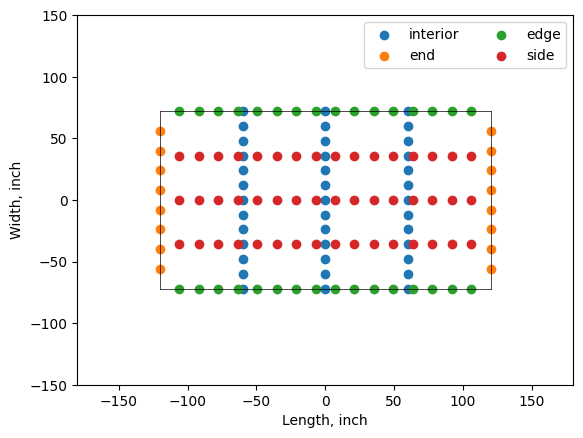

In [ ]:
# Print a diagram for fasteners in a diaphragm

plt.scatter(interior_x,interior_y, label = 'interior')
plt.scatter(end_x,end_y, label='end')
plt.scatter(edge_x,edge_y,label='edge')
plt.scatter(side_x,side_y,label='side')
plt.plot([end_x[0],end_x[0]],[interior_y[-1],interior_y[0]], c='k', linewidth=0.5)
plt.plot([end_x[0],end_x[-1]],[interior_y[0],interior_y[0]], c='k', linewidth=0.5)
plt.plot([end_x[-1],end_x[0]],[interior_y[-1],interior_y[-1]], c='k', linewidth=0.5)
plt.plot([end_x[-1],end_x[-1]],[interior_y[-1],interior_y[0]], c='k', linewidth=0.5)


plt.xlim(-180,180)
plt.ylim(-150,150)
plt.xlabel('Length, inch')
plt.ylabel('Width, inch')
plt.legend(ncol=2)
plt.show()

# **Load-Deformation Inputs for Arc-Spot Welds and Screws**

In [ ]:
# After determining the coordinates of your diaphragm, you'll need specific data from the load-deformation curves of screws and arc-spot welds. The essential data points include maximum load, stiffness, and maximum deformation.
# We offer load-deformation details for screws and arc-spot welds with various geometric parameters. Select the data corresponding to the fasteners in your diaphragm.

# Load-deformation information of side-lap fasteners
# screw with  t= 0.034 in, d= 0.19in
P_f_side = 0.75  # max load, kips
k_side = 35.97 # stiffness, kips/in

# screw with t= 0.047 in, d= 0.19 in
# k_side = 41.54 # kips/in
# P_f_side = 1.22 # kips

# max deformation of screws
delta_f_side = 0.121 # in

# Load-deformation information of arc spot welds
# arc spot welds with t=0.0299 in, d = 5/8 in
# P_f_arc = 1.81 # max load, kips
# k_arc = 44 stiffness # kip/in

# arc spot welds with t=0.034 in, d=5/8 in
P_f_arc = 2.2 # max load, kips
k_arc = 48 # stiffness, kip/in

# arc spot welds with t=0.046 in, d=5/8 in
# P_f_arc = 3.24 # max load, kips
# k_arc = 55 # stiffness, kip/in

# arc spot welds with t=0.057 in, d=5/8 in
# P_f_arc = 4.19 # max load, kips
# k_arc = 47 # stiffness, kip/in

# arc spot welds with t=0.046 in, d= 3/4 in
# P_f_arc = 4 # kips # max load
# k_arc = 36.07 # stiffness, kip/in

# arc spot welds with t=0.0299 in, d= 3/4 in
# P_f_arc = 1.85 # max load, kips
# k_arc = 32.542 # stiffness, kip/in

# maximum deformation of arc spot welds, we assumed 0.12 inch based on Snow and Easterling (2008)
delta_f_arc = 0.2 # in




# **Calculate Diaphragm Strength**

In [ ]:
# Once you determine the coordinates and load-deformation of the fasteners in your diaphragm, you can get the strength of the diaphragm.

L = 20 #diaphragm length, ft
strength = IC(support_x, support_y, side_x, side_y, k_arc,
          delta_f_arc, P_f_arc, k_side, delta_f_side, P_f_side, 0, 16*12/2, 90)

print('Shear strength = {:6.2f} kips'.format(strength[2]))
print('Shear strength = {:6.2f} kips/ft'.format(strength[2]/L))


Shear strength =  14.61 kips
Shear strength =   0.73 kips/ft
